Ce notebook consiste à faire un nettoyage des datasets concernant les terrains de tennis 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import re
import json

Lecture des datasets 

In [2]:
df1 = pd.read_csv('tennis_courtsV0.csv')
df1.head()

,name,address,city,state,zip_code,type,count,clay,wall,grass,indoor,lights,proshop,latitude,longitude
Northwestern High,Adelphi Road,washington,dc,20782.0,Public,6,False,True,False,False,False,False,38.974351,-76.952112,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
The Park at Canterbury,Brandywood Circle,orlando,fl,32792.0,Homeowners Community,1,False,False,False,False,True,False,28.590956,-81.285224,"{""clay""=>""0"", ""type""=>""Homeowners Community"", ..."
Tippit Middle School,Greenlee Drive,austin-san marcos,tx,78628.0,Public,8,False,True,False,False,True,False,30.615173,-97.700794,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
Lexington Park,McKee Street,minneapolis-st. paul,mn,55121.0,Public,1,False,False,False,False,False,False,44.852096,-93.142100,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."
Rogers Junior School,Avenue North,minneapolis-st. paul,mn,55374.0,Public,6,False,False,False,False,False,False,45.207841,-93.544174,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."


In [12]:
df2 = pd.read_csv('gps-tennis-courts0.csv')
df2.head()

,"Complex_Na,C,110","Complex_Ty,C,36","Facility_N,C,146","Facility_T,C,34","Bookable_I,C,146","Assessment,C,18","F8,C,1","Number,N,19,11","Road_Name,C,88","Locality,C,34",...,"Home_Clubs,C,254","Hours_of_O,C,30","Descriptio,C,254","Amenities,C,254","Hire_Agree,C,254","Availabili,C,70","Facebook_P,C,80","Capacity,C,246","LAT,N,19,11","LONG,N,19,11"
0,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 1,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
1,Mannibadar Tennis Reserve,Recreation Reserve,Mannibadar Tennis Reserve Tennis Courts,Tennis Court,Mannibadar Tennis Reserve Tennis Court 2,41400036,NaN,1459,Rokewood-Skipton Road,Mannibadar,...,NaN,NaN,Number of courts: 2\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.760717,143.497898
2,Cape Clear Recreation Reserve,Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Tennis Court,Cape Clear Recreation Reserve Tennis Court,91000683,NaN,0,Recreation Road,Cape Clear,...,NaN,NaN,Number of courts: 1\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.791818,143.611632
3,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 1,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213
4,Haddon Recreation Reserve,Recreation Reserve,Haddon Recreation Reserve Tennis Courts,Tennis Court,Haddon Recreation Reserve Tennis Court 2,66116405,NaN,396,Sago Hill Road,Haddon,...,NaN,NaN,Number of courts: 4\nSurface: Asphalt\nPublic ...,NaN,NaN,NaN,NaN,NaN,-37.588120,143.722213


Analyse des datasets 


1.Suppression des colonnes complétement vides 

In [4]:
def verifier_colonnes_vides(dataframes):
    for i, df in enumerate(dataframes, start=1):
        colonnes_vides = df.columns[df.isnull().all()].tolist()
        if colonnes_vides:
            print(f"Il y a des colonnes vides dans df{i}: {colonnes_vides}")
        else:
            print(f"Aucune colonne vide dans df{i}")
verifier_colonnes_vides([df1, df2])

Aucune colonne vide dans df1
Aucune colonne vide dans df2


Assurer que les colonnes sont supprimées 

In [5]:
def supprimer_colonnes_vides(dataframes):
    for i, df in enumerate(dataframes, start=1):
        colonnes_vides = df.columns[df.isnull().all()].tolist()
        if colonnes_vides:
            df.drop(columns=colonnes_vides, inplace=True)
            print(f"Colonnes vides supprimées de df{i}: {colonnes_vides}")
        else:
            print(f"Aucune colonne vide dans df{i}")
supprimer_colonnes_vides([df1, df2])

Aucune colonne vide dans df1
Aucune colonne vide dans df2


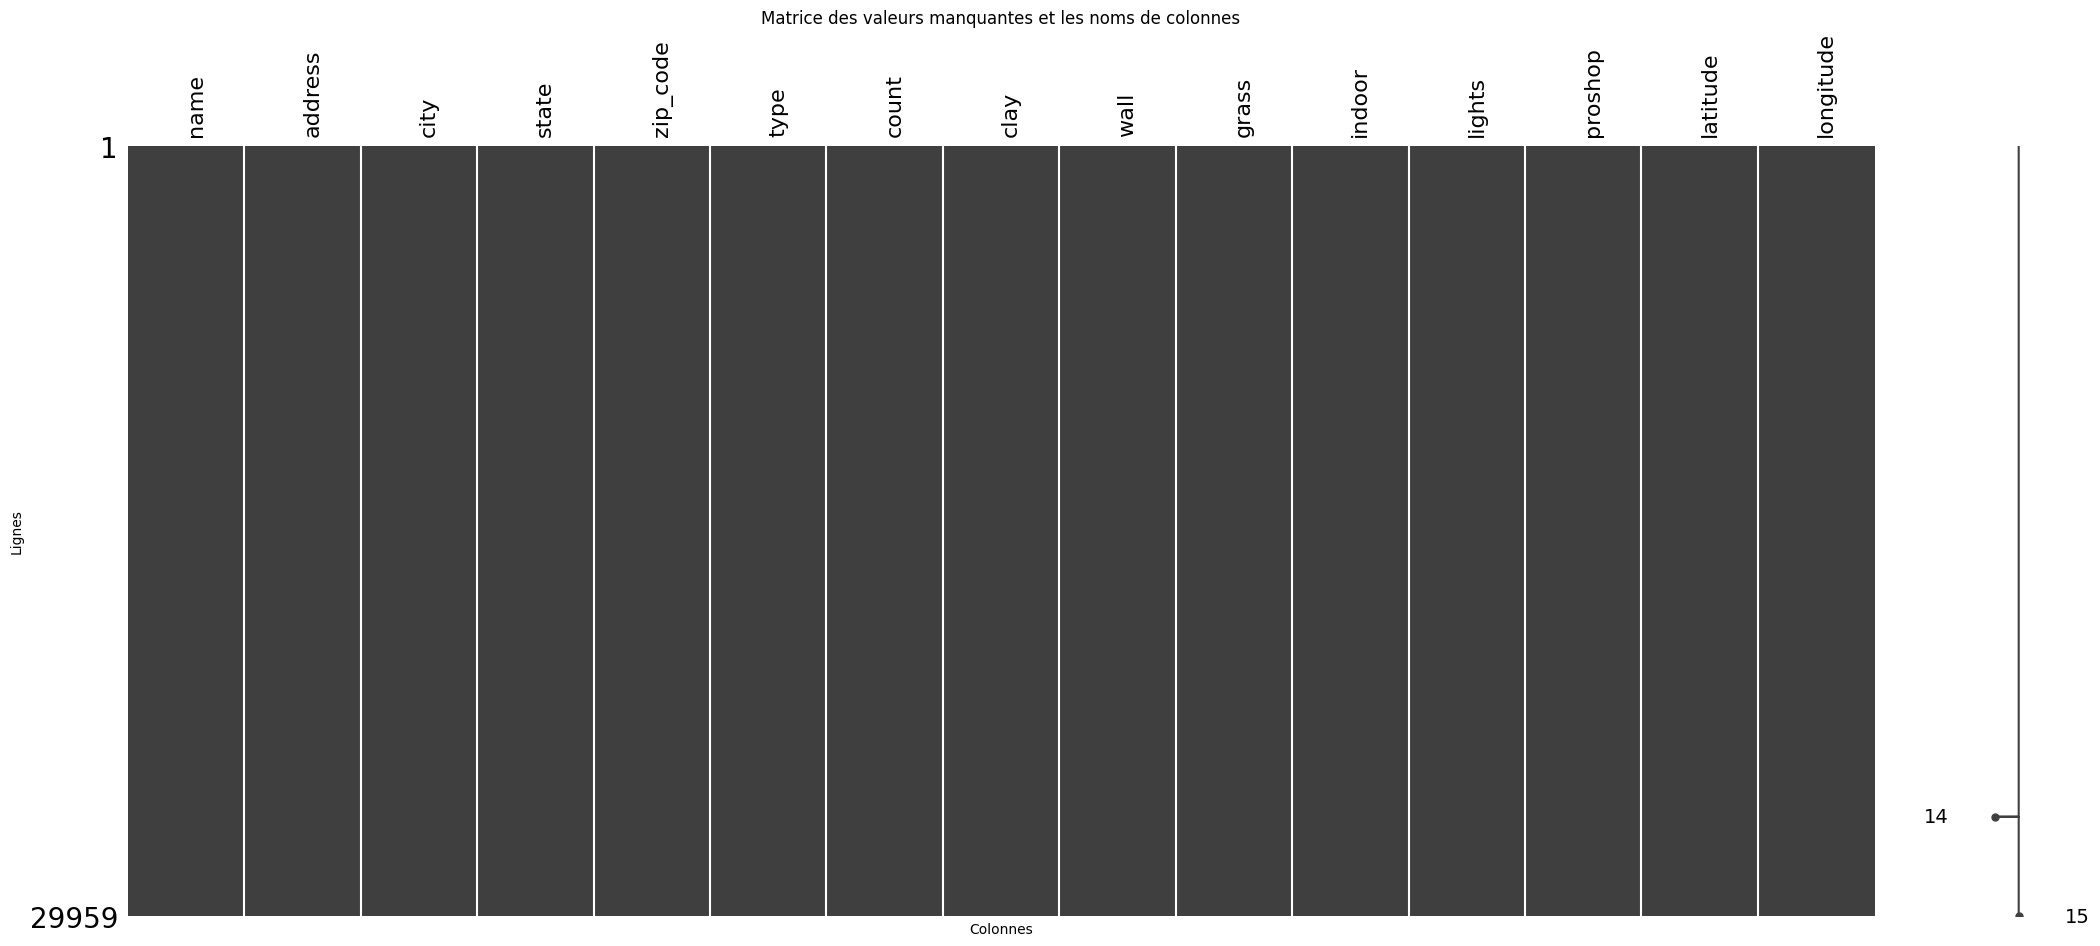

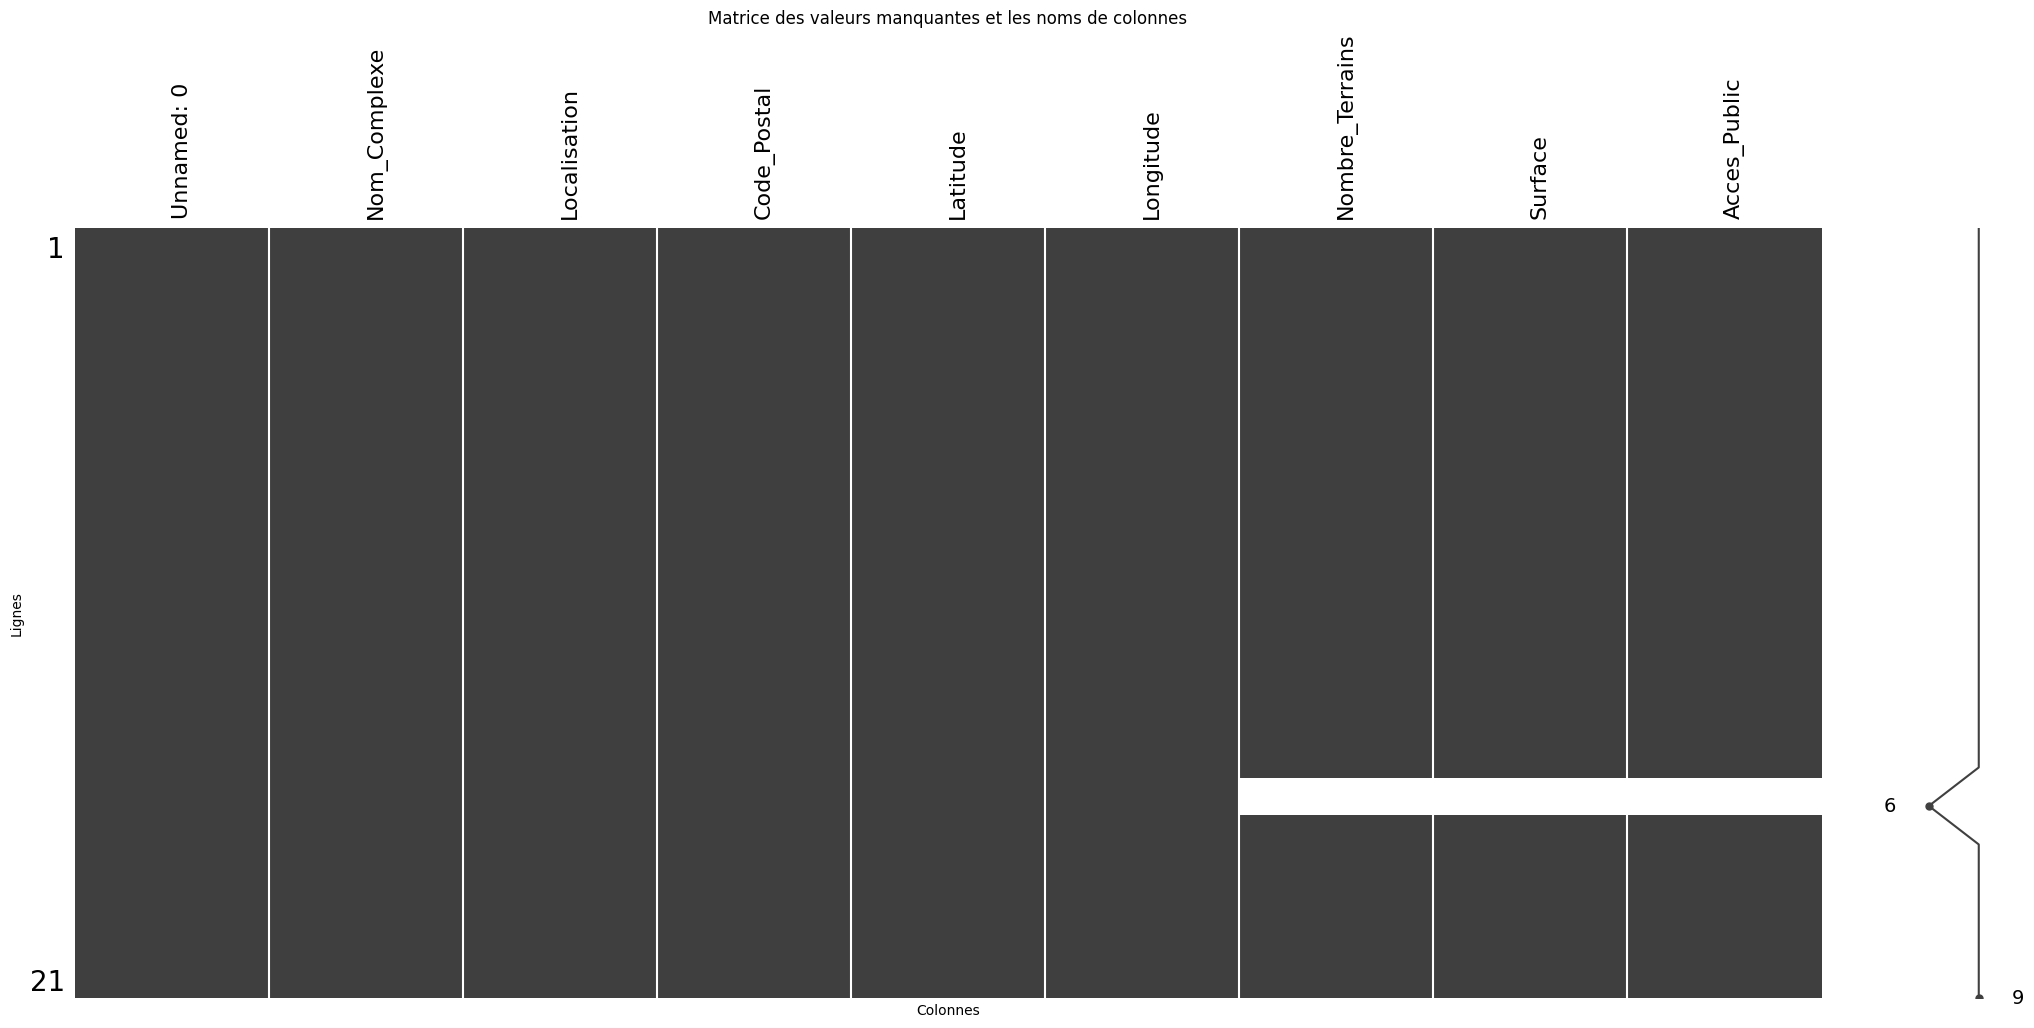

In [6]:
def profil_donnees(nom_data):
    msno.matrix(nom_data)
    noms_colonnes = nom_data.columns   
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)
    plt.show()
profil_donnees(df1)
profil_donnees(df2)

----------------------------------------------------  Nettoyage chaque dataset à part ---------------------------------------------------------------------------

Df1 = tennis_courts

name: Le nom du lieu où se trouve le terrain de tennis.

address: L'adresse du lieu où se trouve le terrain de tennis.

city: La ville où se trouve le terrain de tennis.

zip_code: Le code postal de la ville où se trouve le terrain de tennis.

type: Le type de terrain de tennis (par exemple, public, communauté de propriétaires, etc.).

count: Le nombre de courts de tennis disponibles à ce lieu.

clay: Un indicateur booléen indiquant si le terrain de tennis est en terre battue (True) ou non (False).

wall: Un indicateur booléen indiquant si le terrain de tennis a un mur de pratique (True) ou non (False).

grass: Un indicateur booléen indiquant si le terrain de tennis est en gazon (True) ou non (False).

indoor: Un indicateur booléen indiquant si le terrain de tennis est couvert (True) ou non (False).

lights: Un indicateur booléen indiquant si le terrain de tennis est éclairé (True) ou non (False).

proshop: Un indicateur booléen indiquant si le lieu dispose d'un magasin de tennis (True) ou non (False).

latitude: La latitude du lieu où se trouve le terrain de tennis.

longitude: La longitude du lieu où se trouve le terrain de tennis

1.Suppression de la colonne state 

In [7]:
df1.drop(columns=['state'], inplace=True)

3.Colonnes 'proshop' et longitude'

In [8]:
df1['proshop'] = df1['proshop'].astype('int')
df1.head()

,name,address,city,zip_code,type,count,clay,wall,grass,indoor,lights,proshop,latitude,longitude
Northwestern High,Adelphi Road,washington,dc,Public,6,False,True,False,False,False,False,38,-76.952112,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
The Park at Canterbury,Brandywood Circle,orlando,fl,Homeowners Community,1,False,False,False,False,True,False,28,-81.285224,"{""clay""=>""0"", ""type""=>""Homeowners Community"", ..."
Tippit Middle School,Greenlee Drive,austin-san marcos,tx,Public,8,False,True,False,False,True,False,30,-97.700794,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""1"", ""..."
Lexington Park,McKee Street,minneapolis-st. paul,mn,Public,1,False,False,False,False,False,False,44,-93.142100,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."
Rogers Junior School,Avenue North,minneapolis-st. paul,mn,Public,6,False,False,False,False,False,False,45,-93.544174,"{""clay""=>""0"", ""type""=>""Public"", ""wall""=>""0"", ""..."


In [9]:
def extract_specific_values(row):
    data = row['longitude']
    pattern = r'"(clay|wall|grass|indoor|lights|stringing)"=>"([^"]+)"'
    matches = re.findall(pattern, data)
    values = {key: value for key, value in matches}
    return pd.Series(values)
df_extracted = df1.apply(extract_specific_values, axis=1)
df1 = pd.concat([df1, df_extracted], axis=1)
df1 = df1.drop(columns=['longitude'])
df1

,name,address,city,zip_code,type,count,clay,wall,grass,indoor,lights,proshop,latitude,clay,wall,grass,indoor,lights,stringing
Northwestern High,Adelphi Road,washington,dc,Public,6,False,True,False,False,False,False,38,-76.952112,0,1,0,0,0,0
The Park at Canterbury,Brandywood Circle,orlando,fl,Homeowners Community,1,False,False,False,False,True,False,28,-81.285224,0,0,0,0,1,0
Tippit Middle School,Greenlee Drive,austin-san marcos,tx,Public,8,False,True,False,False,True,False,30,-97.700794,0,1,0,0,1,0
Lexington Park,McKee Street,minneapolis-st. paul,mn,Public,1,False,False,False,False,False,False,44,-93.142100,0,0,0,0,0,0
Rogers Junior School,Avenue North,minneapolis-st. paul,mn,Public,6,False,False,False,False,False,False,45,-93.544174,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Headington Family Tennis Center - University of Oklahoma,Chautauqua Avenue,oklahoma city,ok,Public,12,False,False,False,False,True,False,35,-97.448698,0,0,0,0,1,0
La Mirage,La Mirage Circle,los angeles,ca,Homeowners Community,1,False,False,False,False,True,False,33,-117.729685,0,0,0,0,1,0
Meridian Villa Estates,Avenue Southeast,seattle,wa,Homeowners Community,1,False,False,False,False,False,False,47,-122.165791,0,0,0,0,0,0
Brewer Park,Southwest Street,miami-fort lauderdale,fl,Public,2,False,True,False,False,False,False,25,-80.296412,0,1,0,0,0,0


-----------------------------------------------------------------Nettoyage dataset 2 -------------------------------------------------------------------

In [10]:
df2.head()

,Unnamed: 0,Nom_Complexe,Localisation,Code_Postal,Latitude,Longitude,Nombre_Terrains,Surface,Acces_Public
0,0,Mannibadar Tennis Reserve,Mannibadar,3360,-37.760717,143.497898,2.0,Asphalt,Yes
1,2,Cape Clear Recreation Reserve,Cape Clear,3351,-37.791818,143.611632,1.0,Asphalt,Yes
2,3,Haddon Recreation Reserve,Haddon,3351,-37.588120,143.722213,4.0,Asphalt,Yes
3,7,Ross Creek Recreation Reserve,Ross Creek,3351,-37.632091,143.758713,4.0,Plexipave,Yes
4,11,Napoleons Recreation Reserve,Napoleons,3352,-37.680147,143.825216,6.0,Plexipave,Yes


Complex_Na :  nom du complexe.

Complex_Ty : type de complexe, par exemple, s'il s'agit d'un centre sportif, d'une piscine, etc.


Locality : localité ou le quartier où se trouve le complexe.

Post_Code : code postal du complexe. 

Description :  description du complexe ou des installations disponibles.

LAT : la latitude géographique du complexe. 

LONG : la longitude géographique du complexe. 

1. Supression des colonnes innutiles 

In [11]:
#colonnes à supprimer
colonnes_a_supprimer = ['Complex_Ty,C,36', 'Facility_N,C,146', 'Facility_T,C,34', 'Assessment,C,18', 'Number,N,19,11', 'Road_Name,C,88', 'Contact_Na,C,54', 'Contact_Nu,C,50', 'Contact_Em,C,86', 'Home_Clubs,C,254']
df2.drop(columns=colonnes_a_supprimer, inplace=True)
df2.head()

KeyError: "['Complex_Ty,C,36', 'Facility_N,C,146', 'Facility_T,C,34', 'Assessment,C,18', 'Number,N,19,11', 'Road_Name,C,88', 'Contact_Na,C,54', 'Contact_Nu,C,50', 'Contact_Em,C,86', 'Home_Clubs,C,254'] not found in axis"

2.Traitement de la colonne 'Descriptio,C,254'

In [185]:
# Diviser les données de la colonne 'Descriptio' en plusieurs colonnes
df2[['Number_courts', 'Surface', 'Public Access']] = df2['Descriptio,C,254'].str.extract(r'Number of courts: (\d+)\nSurface: ([^\n]+)\nPublic Access:([^\n]+)')

In [186]:
df2.drop(columns=['Descriptio,C,254'], inplace=True)
df2.head()

,"Complex_Na,C,110","Bookable_I,C,146","Locality,C,34","Post_Code,N,19,11","LAT,N,19,11","LONG,N,19,11",Number_courts,Surface,Public Access
0,Mannibadar Tennis Reserve,Mannibadar Tennis Reserve Tennis Court 1,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
1,Mannibadar Tennis Reserve,Mannibadar Tennis Reserve Tennis Court 2,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
2,Cape Clear Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Cape Clear,3351,-37.791818,143.611632,1,Asphalt,Yes
3,Haddon Recreation Reserve,Haddon Recreation Reserve Tennis Court 1,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes
4,Haddon Recreation Reserve,Haddon Recreation Reserve Tennis Court 2,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes


3.Doublons

In [187]:
 df2_filtered = df2[df2['Bookable_I,C,146'].str.match(r'.*Court\s?1?$|.*Court$')]
df2_filtered

,"Complex_Na,C,110","Bookable_I,C,146","Locality,C,34","Post_Code,N,19,11","LAT,N,19,11","LONG,N,19,11",Number_courts,Surface,Public Access
0,Mannibadar Tennis Reserve,Mannibadar Tennis Reserve Tennis Court 1,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
2,Cape Clear Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Cape Clear,3351,-37.791818,143.611632,1,Asphalt,Yes
3,Haddon Recreation Reserve,Haddon Recreation Reserve Tennis Court 1,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes
7,Ross Creek Recreation Reserve,Ross Creek Recreation Reserve Tennis Court 1,Ross Creek,3351,-37.632091,143.758713,4,Plexipave,Yes
11,Napoleons Recreation Reserve,Napoleons Recreation Reserve Tennis Court 1,Napoleons,3352,-37.680147,143.825216,6,Plexipave,Yes
17,Grenville Recreation Reserve,Grenville Recreation Reserve Tennis Court 1,Grenville,3351,-37.769056,143.884521,2,Asphalt,Yes
19,Woady Yaloak Recreation Reserve,Smythesdale Tennis Court 1,Smythesdale,3351,-37.641810,143.683965,4,Asphalt/Plexipave,Yes
23,Linton Recreation Reserve,Linton Tennis Court 1,Linton,3360,-37.683470,143.568120,4,Asphalt/Plexipave,Yes
27,Bannockburn Recreation Precinct,Bannockburn Tennis Court 1,Bannockburn,3331,-38.036428,144.164469,6,Rebound Ace,Yes
33,Lethbridge Recreation Reserve,Lethbridge Recreation Reserve Tennis Court 1,Lethbridge,3332,-37.967564,144.134532,3,Asphalt/Plexipave,Yes


In [188]:
# Remplacer "Court 1" par "Court"
df2_filtered['Bookable_I,C,146'] = df2_filtered['Bookable_I,C,146'].str.replace('Court 1', 'Court')
df2_filtered

C:\Users\sonia\AppData\Local\Temp\ipykernel_2584\2375405778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['Bookable_I,C,146'] = df2_filtered['Bookable_I,C,146'].str.replace('Court 1', 'Court')


,"Complex_Na,C,110","Bookable_I,C,146","Locality,C,34","Post_Code,N,19,11","LAT,N,19,11","LONG,N,19,11",Number_courts,Surface,Public Access
0,Mannibadar Tennis Reserve,Mannibadar Tennis Reserve Tennis Court,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
2,Cape Clear Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Cape Clear,3351,-37.791818,143.611632,1,Asphalt,Yes
3,Haddon Recreation Reserve,Haddon Recreation Reserve Tennis Court,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes
7,Ross Creek Recreation Reserve,Ross Creek Recreation Reserve Tennis Court,Ross Creek,3351,-37.632091,143.758713,4,Plexipave,Yes
11,Napoleons Recreation Reserve,Napoleons Recreation Reserve Tennis Court,Napoleons,3352,-37.680147,143.825216,6,Plexipave,Yes
17,Grenville Recreation Reserve,Grenville Recreation Reserve Tennis Court,Grenville,3351,-37.769056,143.884521,2,Asphalt,Yes
19,Woady Yaloak Recreation Reserve,Smythesdale Tennis Court,Smythesdale,3351,-37.641810,143.683965,4,Asphalt/Plexipave,Yes
23,Linton Recreation Reserve,Linton Tennis Court,Linton,3360,-37.683470,143.568120,4,Asphalt/Plexipave,Yes
27,Bannockburn Recreation Precinct,Bannockburn Tennis Court,Bannockburn,3331,-38.036428,144.164469,6,Rebound Ace,Yes
33,Lethbridge Recreation Reserve,Lethbridge Recreation Reserve Tennis Court,Lethbridge,3332,-37.967564,144.134532,3,Asphalt/Plexipave,Yes


4.Rennomer les colonnes : 

In [189]:
df2_filtered.rename(columns={
    'Complex_Na,C,110': 'Nom_Complexe',
    'Locality,C,34': 'Localisation',
    'Post_Code,N,19,11': 'Code_Postal',
    'LAT,N,19,11': 'Latitude',
    'LONG,N,19,11': 'Longitude',
    'Number_courts': 'Nombre_Terrains',
    'Public Access': 'Acces_Public'
}, inplace=True)

df2_filtered.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_2584\3234073504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered.rename(columns={


,Nom_Complexe,"Bookable_I,C,146",Localisation,Code_Postal,Latitude,Longitude,Nombre_Terrains,Surface,Acces_Public
0,Mannibadar Tennis Reserve,Mannibadar Tennis Reserve Tennis Court,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
2,Cape Clear Recreation Reserve,Cape Clear Recreation Reserve Tennis Court,Cape Clear,3351,-37.791818,143.611632,1,Asphalt,Yes
3,Haddon Recreation Reserve,Haddon Recreation Reserve Tennis Court,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes
7,Ross Creek Recreation Reserve,Ross Creek Recreation Reserve Tennis Court,Ross Creek,3351,-37.632091,143.758713,4,Plexipave,Yes
11,Napoleons Recreation Reserve,Napoleons Recreation Reserve Tennis Court,Napoleons,3352,-37.680147,143.825216,6,Plexipave,Yes


In [190]:
df2_filtered.drop(columns=['Bookable_I,C,146'], inplace=True)
df2_filtered.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_2584\2749166705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered.drop(columns=['Bookable_I,C,146'], inplace=True)


,Nom_Complexe,Localisation,Code_Postal,Latitude,Longitude,Nombre_Terrains,Surface,Acces_Public
0,Mannibadar Tennis Reserve,Mannibadar,3360,-37.760717,143.497898,2,Asphalt,Yes
2,Cape Clear Recreation Reserve,Cape Clear,3351,-37.791818,143.611632,1,Asphalt,Yes
3,Haddon Recreation Reserve,Haddon,3351,-37.588120,143.722213,4,Asphalt,Yes
7,Ross Creek Recreation Reserve,Ross Creek,3351,-37.632091,143.758713,4,Plexipave,Yes
11,Napoleons Recreation Reserve,Napoleons,3352,-37.680147,143.825216,6,Plexipave,Yes


Sauvegarde des df1 et df2 

In [191]:
df1.to_csv('tennis_courtsV1.csv')

In [192]:
df2_filtered.to_csv('gps-tennis-courtsV1.csv')